<a href="https://colab.research.google.com/github/poronita/Credit-Card-Spending-Habits-in-India/blob/main/Credit_Card_Spending_Habits_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv("/content/Credit card transactions - India - Simple.csv")


In [5]:
# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['City'] = data['City'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)
data = data.drop_duplicates().dropna()



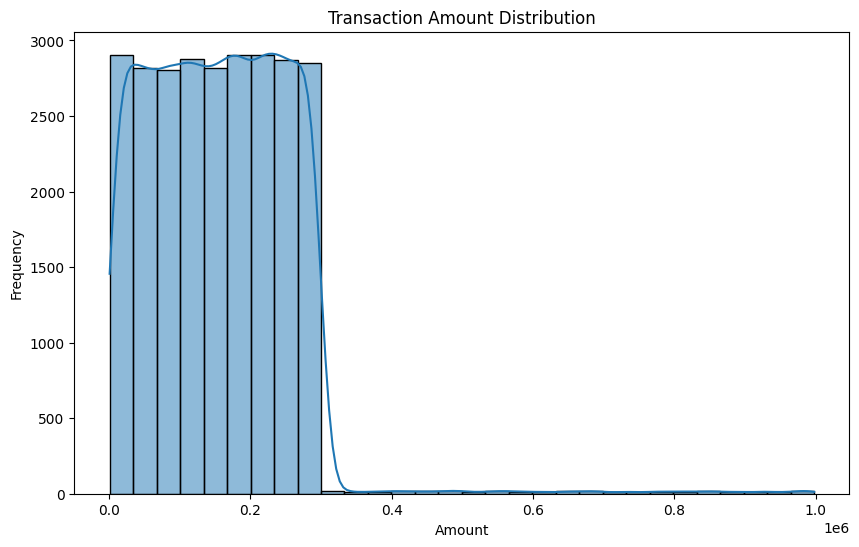

In [6]:
# EDA - Visualizing distributions and correlations
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-066cd10f24c0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


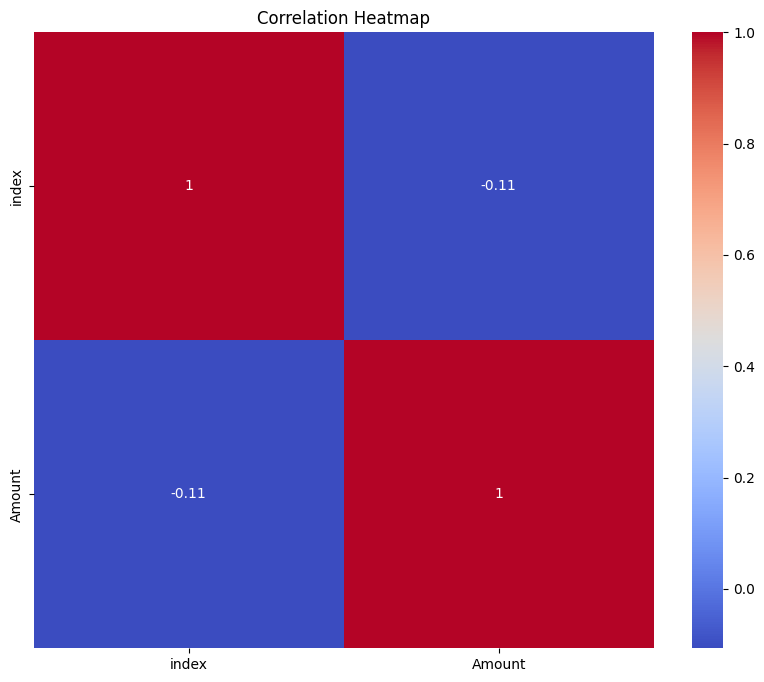

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

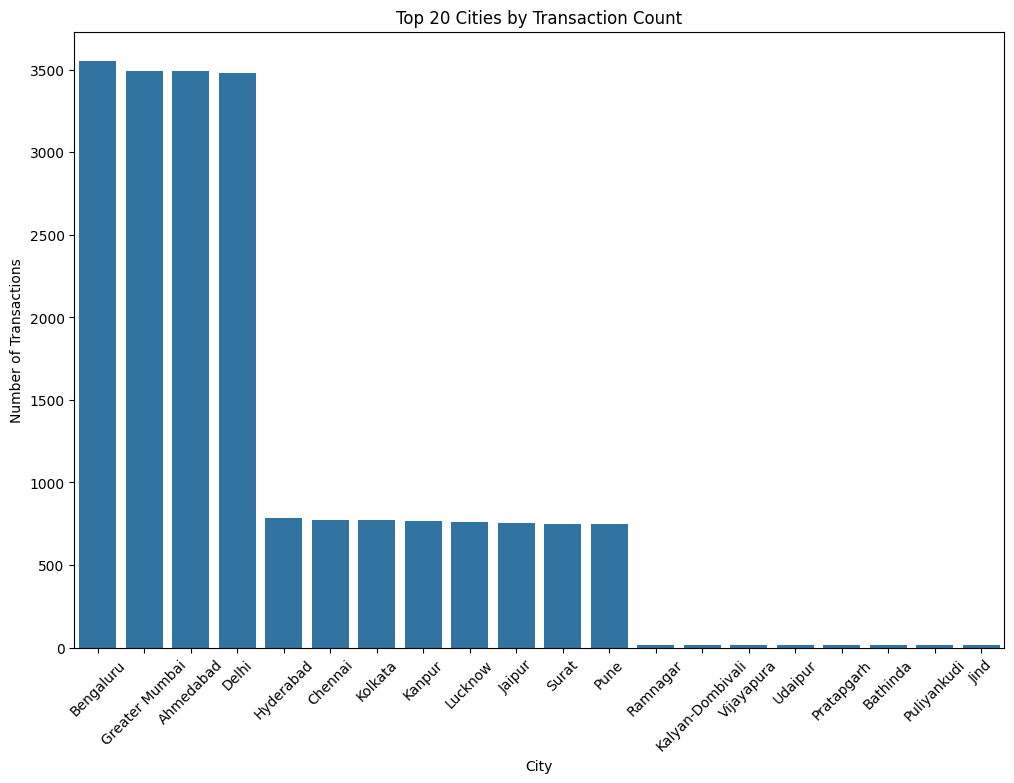

In [17]:
# Transaction counts by city
plt.figure(figsize=(12, 8))
city_counts = data['City'].value_counts().head(20)  # Top 20 cities
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.xticks(rotation=45)
plt.title('Top 20 Cities by Transaction Count')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.show()

In [18]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Month'] = data['Date'].dt.month  # Extract month for seasonal analysis
data['Year'] = data['Date'].dt.year  # Extract year for trend analysis

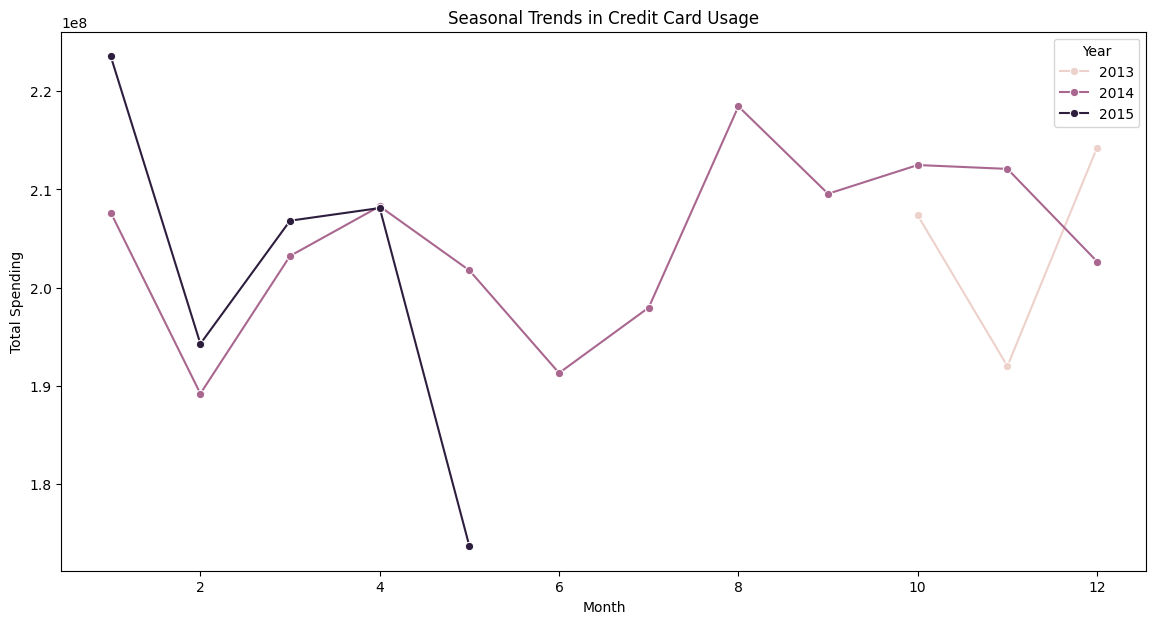

In [19]:
# Analyzing seasonal trends in credit card usage
monthly_transactions = data.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Amount', hue='Year', data=monthly_transactions, marker='o')
plt.title('Seasonal Trends in Credit Card Usage')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.legend(title='Year')
plt.show()

In [8]:
# Feature Engineering for Modeling
X = pd.get_dummies(data.drop(['Amount', 'index', 'Date'], axis=1), drop_first=True)
y = data['Amount']

In [9]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Predictive Modeling with XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10242496409.923887


In [12]:
# K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)
data['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


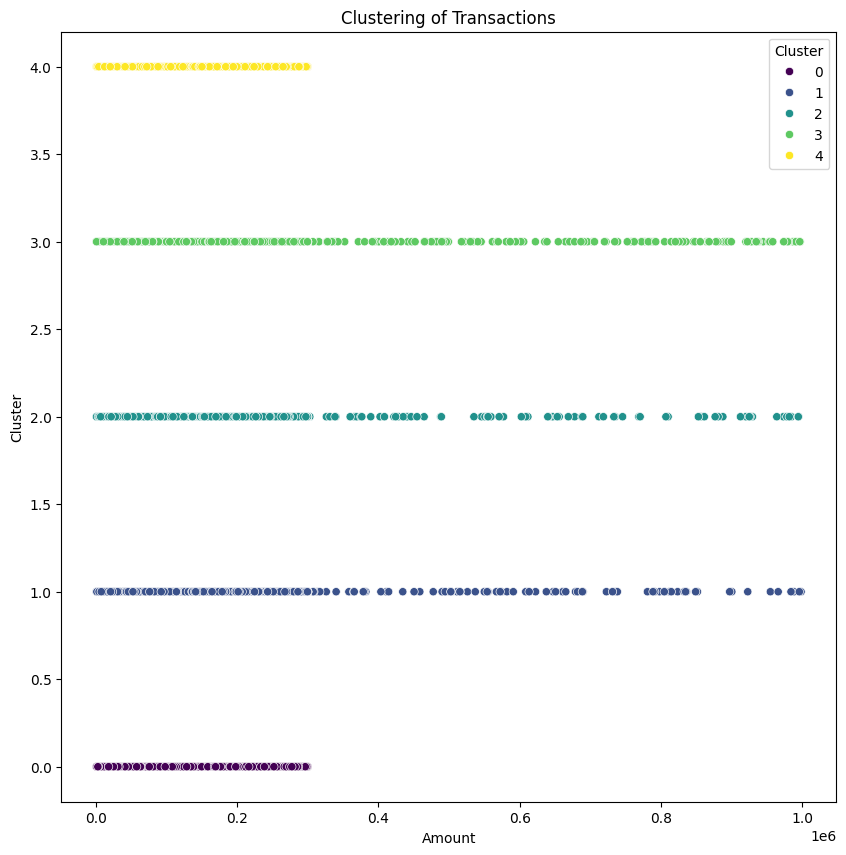

In [15]:
# Visualization of Clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='Amount', y='Cluster', hue='Cluster', palette='viridis')
plt.title('Clustering of Transactions')
plt.xlabel('Amount')
plt.ylabel('Cluster')
plt.show()

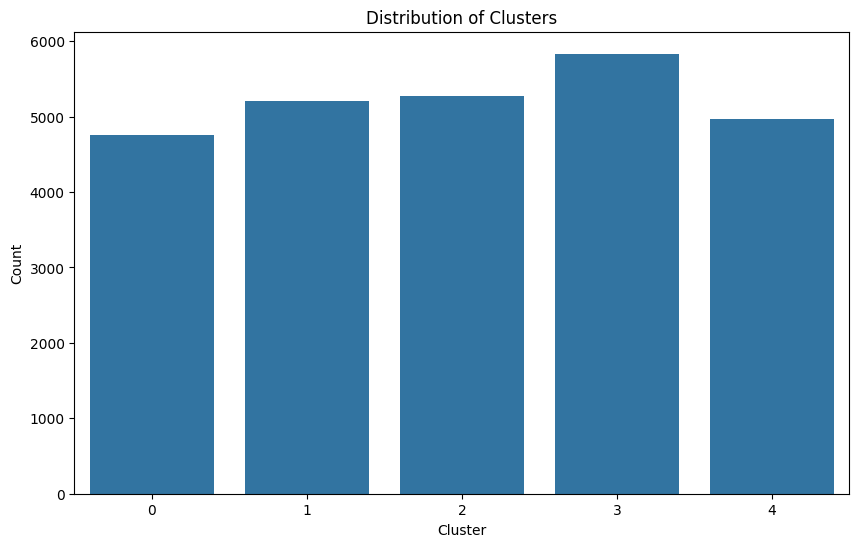

In [14]:
# Further EDA based on Clusters
cluster_counts = data['Cluster'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()